### Importing librairies and dataset

In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
pd.options.mode.chained_assignment = None

In [2]:
df = pd.read_csv('ds_salaries.csv')

### Understanding the dataset

In [3]:
df.head()

,Unnamed: 0,work_year,experience_level,employment_type,job_title,salary,salary_currency,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
0,0,2020,MI,FT,Data Scientist,70000,EUR,79833,DE,0,DE,L
1,1,2020,SE,FT,Machine Learning Scientist,260000,USD,260000,JP,0,JP,S
2,2,2020,SE,FT,Big Data Engineer,85000,GBP,109024,GB,50,GB,M
3,3,2020,MI,FT,Product Data Analyst,20000,USD,20000,HN,0,HN,S
4,4,2020,SE,FT,Machine Learning Engineer,150000,USD,150000,US,50,US,L


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 607 entries, 0 to 606
Data columns (total 12 columns):
 #   Column              Non-Null Count  Dtype 
---  ------              --------------  ----- 
 0   Unnamed: 0          607 non-null    int64 
 1   work_year           607 non-null    int64 
 2   experience_level    607 non-null    object
 3   employment_type     607 non-null    object
 4   job_title           607 non-null    object
 5   salary              607 non-null    int64 
 6   salary_currency     607 non-null    object
 7   salary_in_usd       607 non-null    int64 
 8   employee_residence  607 non-null    object
 9   remote_ratio        607 non-null    int64 
 10  company_location    607 non-null    object
 11  company_size        607 non-null    object
dtypes: int64(5), object(7)
memory usage: 57.0+ KB


In [5]:
df.describe()

,Unnamed: 0,work_year,salary,salary_in_usd,remote_ratio
count,607.000000,607.000000,6.070000e+02,607.000000,607.00000
mean,303.000000,2021.405272,3.240001e+05,112297.869852,70.92257
std,175.370085,0.692133,1.544357e+06,70957.259411,40.70913
min,0.000000,2020.000000,4.000000e+03,2859.000000,0.00000
25%,151.500000,2021.000000,7.000000e+04,62726.000000,50.00000
50%,303.000000,2022.000000,1.150000e+05,101570.000000,100.00000
75%,454.500000,2022.000000,1.650000e+05,150000.000000,100.00000
max,606.000000,2022.000000,3.040000e+07,600000.000000,100.00000


In [6]:
df.shape

(607, 12)

In [7]:
features = list(df.drop(["salary_in_usd", "Unnamed: 0"], axis=1).columns)
print("Variables indépendantes : ", features)

print("------------------------------------------------------------------")

target = "salary_in_usd"
print("Variable à prédire : ", target)


Variables indépendantes :  ['work_year', 'experience_level', 'employment_type', 'job_title', 'salary', 'salary_currency', 'employee_residence', 'remote_ratio', 'company_location', 'company_size']
------------------------------------------------------------------
Variable à prédire :  salary_in_usd


### Data cleaning

In [8]:
df.drop(columns=['Unnamed: 0', 'salary_currency', 'salary' ],axis=1,inplace=True)

In [9]:
df.isnull().sum()

work_year             0
experience_level      0
employment_type       0
job_title             0
salary_in_usd         0
employee_residence    0
remote_ratio          0
company_location      0
company_size          0
dtype: int64

In [10]:
df['experience_level'] = df['experience_level'].replace('EN','Entry-level/Junior')
df['experience_level'] = df['experience_level'].replace('MI','Mid-level/Intermediate')
df['experience_level'] = df['experience_level'].replace('SE','Senior-level/Expert')
df['experience_level'] = df['experience_level'].replace('EX','Executive-level/Director')

In [11]:
df['employment_type'] = df['employment_type'].replace('PT','Part-time')
df['employment_type'] = df['employment_type'].replace('FT','Full-time')
df['employment_type'] = df['employment_type'].replace('CT','Contract')
df['employment_type'] = df['employment_type'].replace('FL','Freelance')

### Exploratory Data Analysis

In [12]:
df['salary_in_usd'].describe()

count       607.000000
mean     112297.869852
std       70957.259411
min        2859.000000
25%       62726.000000
50%      101570.000000
75%      150000.000000
max      600000.000000
Name: salary_in_usd, dtype: float64

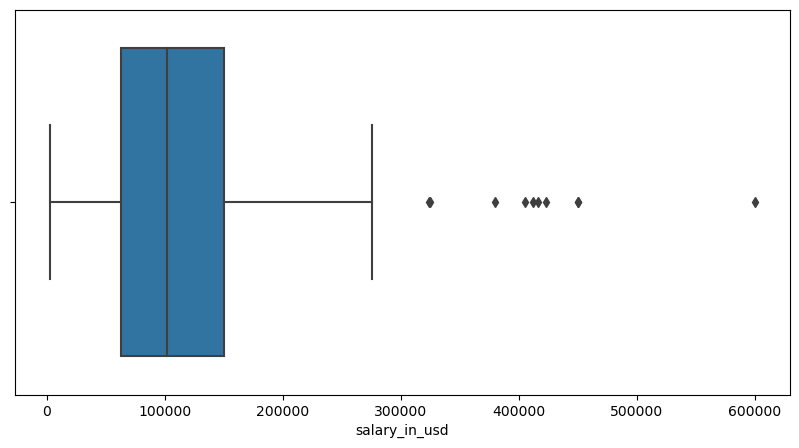

In [13]:
plt.figure(figsize=(10,5))
sns.boxplot(data=df,x='salary_in_usd')
plt.show()

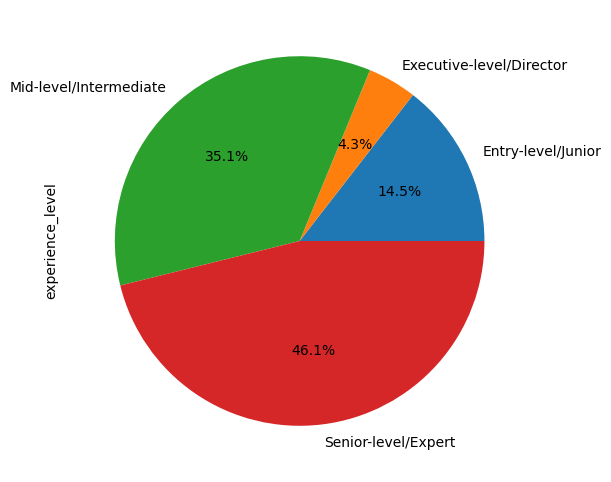

In [14]:
df.groupby('experience_level')['experience_level'].count().plot.pie(autopct="%1.1f%%", figsize=(10,6));

<AxesSubplot:xlabel='count', ylabel='employee_residence'>

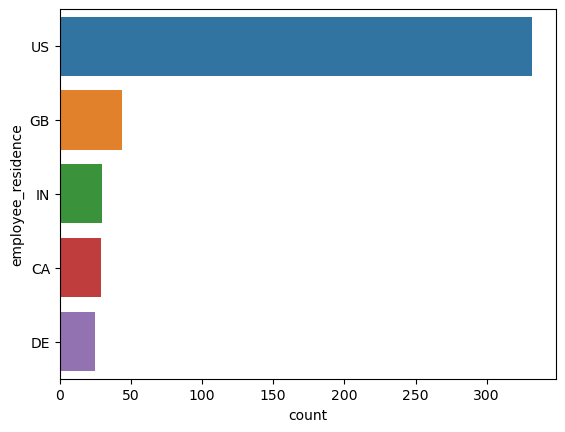

In [15]:
sns.countplot(y=df['employee_residence'],order=df['employee_residence'].value_counts().head().index)


<AxesSubplot:xlabel='count', ylabel='company_location'>

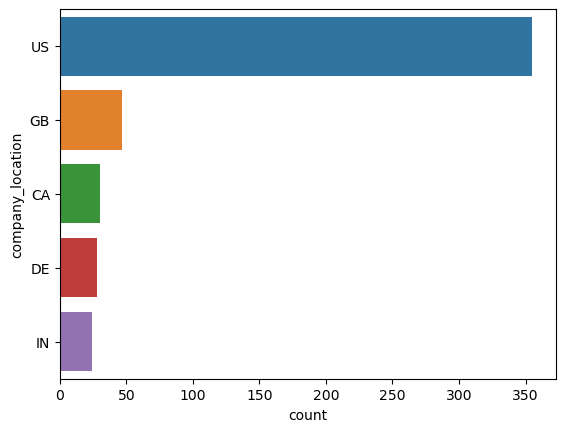

In [16]:
sns.countplot(y=df['company_location'],order=df['company_location'].value_counts().head().index)

<AxesSubplot:title={'center':'Number of workers per job'}>

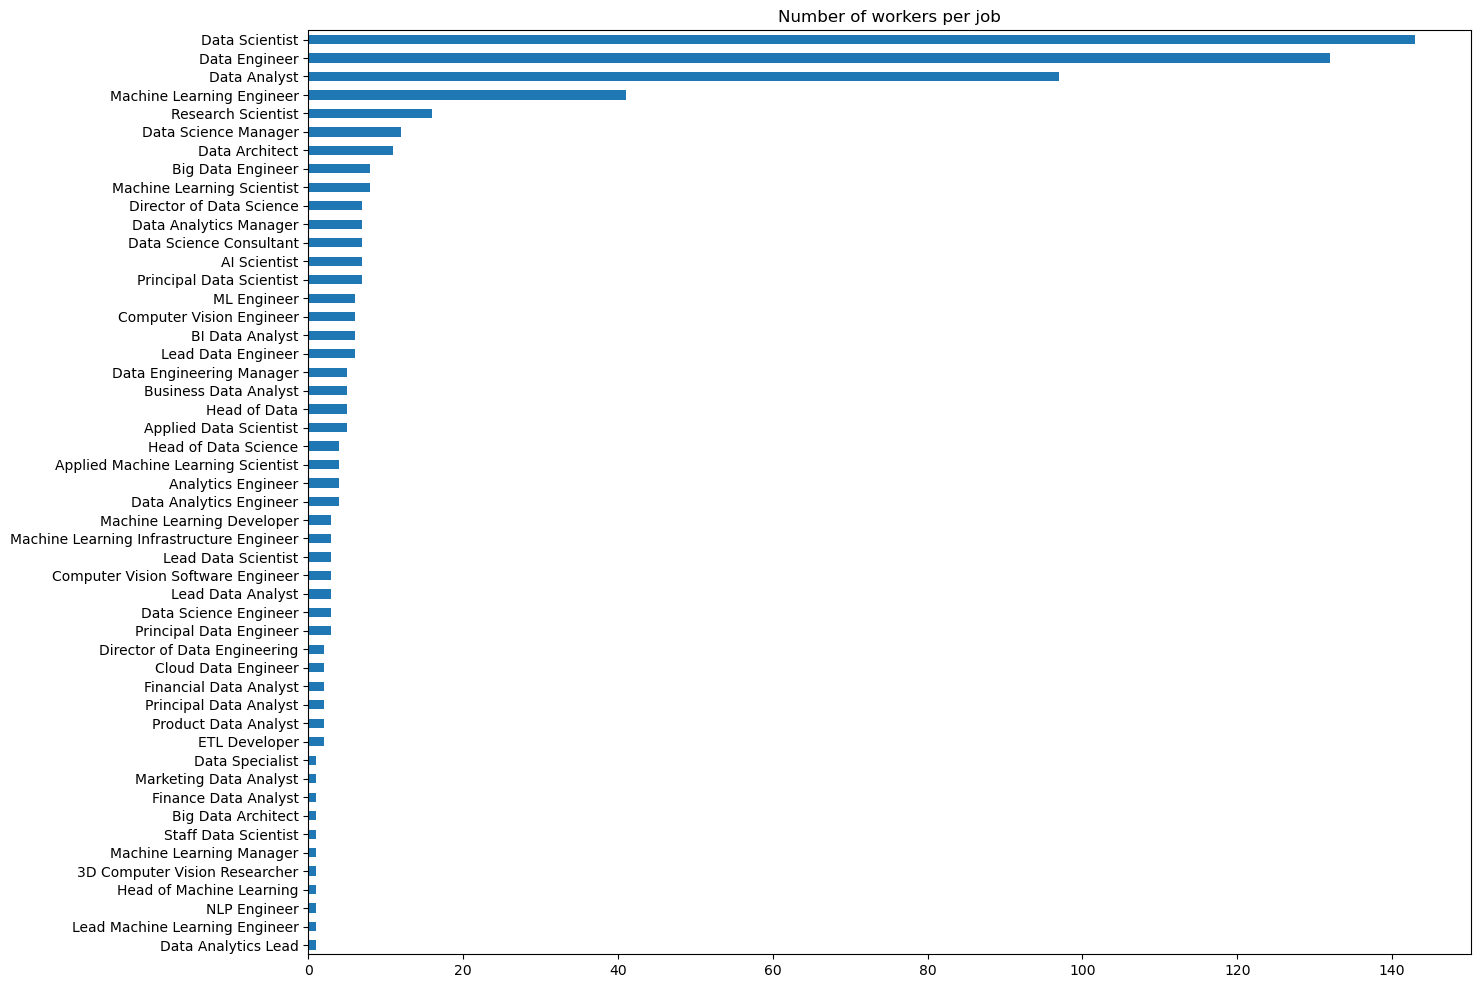

In [17]:
df['job_title'].value_counts().sort_values().plot(kind='barh', title='Number of workers per job', figsize=(15,12))

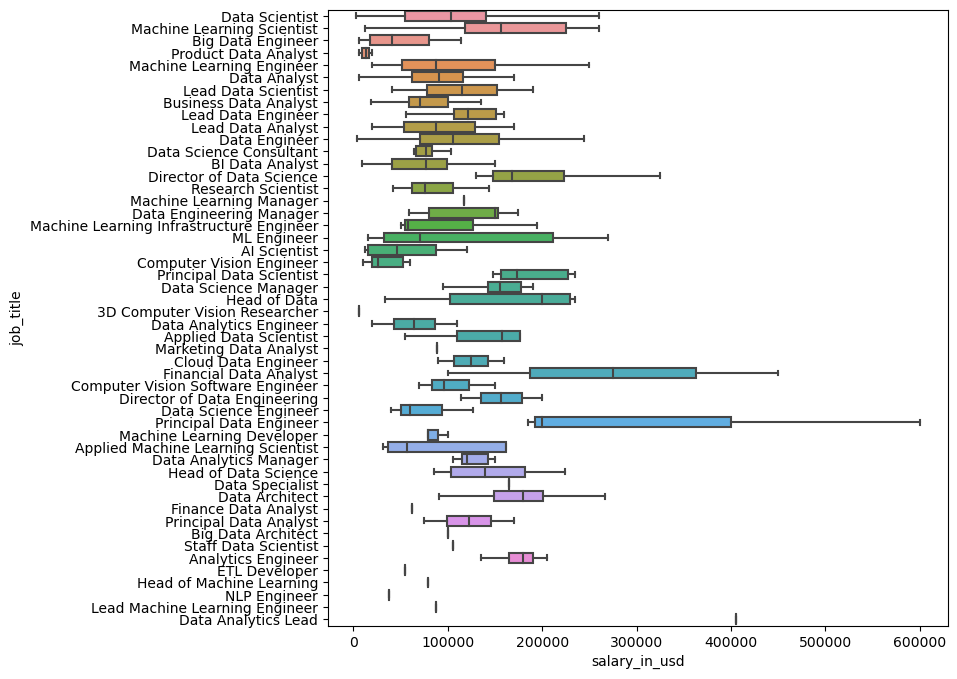

In [18]:
fig = plt.figure(figsize=(8,8))
ax = fig.add_subplot(1, 1, 1)
sns.boxplot(y='job_title', x='salary_in_usd', data=df, showfliers=False, ax=ax)
# sns.stripplot(y='job_title', x='salary_in_usd', data=df, jitter=True, color='black', ax=ax)
plt.show()

##  Feature engineering 

In [19]:
df.sample()

,work_year,experience_level,employment_type,job_title,salary_in_usd,employee_residence,remote_ratio,company_location,company_size
267,2021,Mid-level/Intermediate,Full-time,Data Engineer,111775,US,0,US,M


#### Experience level


In [20]:
experience = {
    'Entry-level/Junior': 0, 
    'Mid-level/Intermediate': 1, 
    'Senior-level/Expert': 2, 
    'Executive-level/Director': 3
}

In [21]:
df['experience_level'] = df['experience_level'].map(experience)

#### Job title

In [22]:
def replace_title(x):
    if ( x.find('Data Science')>=0  or  x.find('Data Scientist')>=0   ):
        df['job_title'].replace(x,'Data Scientist',inplace = True)
    elif ( x.find('Analyst')>=0  or  x.find('Analytics')>=0 ): 
        df['job_title'].replace(x,'Data Analyst',inplace = True)
    elif ( x.find('ML')>=0  or  x.find('Machine Learning')>=0 ) :
        df['job_title'].replace(x,'Machine Learning Engineer',inplace = True) 
    elif ( x.find('Data Engineer')>=0  or  x.find('Data Engineering')>=0 ):
        df['job_title'].replace(x,'Data Engineer',inplace = True)

In [23]:
jobs = ['Data Scientist', 'Data Analyst', 'Machine Learning Engineer', 'Data Engineer']

for i in df['job_title']:
    replace_title(i)
    
df = df[df['job_title'].isin(jobs)]

In [24]:
df['job_title'].value_counts()

Data Scientist               192
Data Engineer                158
Data Analyst                 135
Machine Learning Engineer     68
Name: job_title, dtype: int64

#### Size

In [25]:
size = {
    'S': 0,
    'M': 1,
    'L': 2
}

In [26]:
df['company_size'] = df['company_size'].map(size)

#### Employee residence & Company location

In [27]:
def replace_location(x):
    locations = ['US', 'GB', 'CA', 'DE', 'IN']
    if x in locations:
        return x
    else:
        return 'Other'

In [28]:
df['employee_residence'] = df['employee_residence'].apply(replace_location)

In [29]:
df['company_location'] = df['company_location'].apply(replace_location)


## Preprocessing


In [30]:
nums = df.select_dtypes(exclude="object").columns
nums

Index(['work_year', 'experience_level', 'salary_in_usd', 'remote_ratio',
       'company_size'],
      dtype='object')

In [31]:
cats = df.select_dtypes(include="object").columns
cats

Index(['employment_type', 'job_title', 'employee_residence',
       'company_location'],
      dtype='object')

In [32]:
df = pd.get_dummies(df, columns=cats, drop_first=True)

In [34]:
df.sample()

,work_year,experience_level,salary_in_usd,remote_ratio,company_size,employment_type_Freelance,employment_type_Full-time,employment_type_Part-time,job_title_Data Engineer,job_title_Data Scientist,...,employee_residence_DE,employee_residence_GB,employee_residence_IN,employee_residence_Other,employee_residence_US,company_location_DE,company_location_GB,company_location_IN,company_location_Other,company_location_US
129,2021,2,40570,50,2,0,1,0,0,1,...,0,0,1,0,0,0,0,1,0,0


### Training the model

In [35]:
from sklearn.model_selection import train_test_split

X = df.drop(['salary_in_usd'], axis=1)
y = df['salary_in_usd']

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=0)

In [40]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)


In [41]:
#Regression
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import GradientBoostingRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error,r2_score,mean_absolute_error
from math import sqrt

models = {
    "Linear regression":LinearRegression(),
    "KNeighbors ":KNeighborsRegressor(),
    "GradientBoosting":GradientBoostingRegressor(),
    "DecisionTree":DecisionTreeRegressor(),
    "RandomForest": RandomForestRegressor()
}

In [42]:
results = {
    "Model":[],
    "Train Score":[],
    "Test Score":[],
    "RMSE":[]
}

In [47]:
for name, model in models.items():
    model.fit(X_train, y_train)
    train_s = model.score(X_train, y_train)
    test_s = model.score(X_test, y_test)
    y_pred = model.predict(X_test)
    RMSE = sqrt(mean_squared_error(y_test, y_pred))
    results["Model"].append(name)
    results["Train Score"].append(train_s)
    results["Test Score"].append(test_s)
    results["RMSE"].append(RMSE)
    print("Model: " , name)
    print("Train Score: " , train_s)
    print("Test Score : " , test_s)
    print("RMSE : " , round(RMSE,2))
    print("===========================")

Model:  Linear regression
Train Score:  0.5604269834261961
Test Score :  0.383284362574397
RMSE :  57103.48
Model:  KNeighbors 
Train Score:  0.6138967903804347
Test Score :  0.28800164340141843
RMSE :  61356.36
Model:  GradientBoosting
Train Score:  0.7431494999628206
Test Score :  0.41664350872193945
RMSE :  55537.6
Model:  DecisionTree
Train Score:  0.8722702105848992
Test Score :  0.10563428286877041
RMSE :  68766.61
Model:  RandomForest
Train Score:  0.8325821535259644
Test Score :  0.36514269557414425
RMSE :  57937.28


In [44]:
scores = pd.DataFrame(results)
scores

,Model,Train Score,Test Score,RMSE
0,Linear regression,0.691625,0.545060,137102.429372
1,KNeighbors,0.694143,0.439885,137102.404130
2,GradientBoosting,0.821941,0.546076,137102.421797
3,DecisionTree,0.925188,0.362899,137102.418463
4,RandomForest,0.893201,0.531298,137102.420672


### Improving the model

In [45]:
from sklearn.model_selection import GridSearchCV

param_grid = {
    'n_estimators': [50, 100, 200],
    'max_depth': [None, 10, 20],
    'min_samples_split': [2, 5, 10],
    'min_samples_leaf': [1, 2, 4],
    'bootstrap': [True, False]
}

grid_search = GridSearchCV(models["RandomForest"], param_grid, cv=5, scoring='r2', n_jobs=-1)

grid_search.fit(X_train, y_train)

print("Best Parameters:", grid_search.best_params_)

best_model = grid_search.best_estimator_
test_predictions = best_model.predict(X_test)
test_score = best_model.score(X_test, y_test)
train_score = best_model.score(X_train, y_train)

from sklearn.metrics import mean_absolute_error, mean_squared_error

print("Train Score:", train_score)
print("Test Score:", test_score)
print("MAE:", round(mean_absolute_error(y_test, test_predictions), 2))
print("MSE:", round(mean_squared_error(y_test, test_predictions), 2))
print("RMSE:", round(sqrt(mean_squared_error(y_test, test_predictions)), 2))

Best Parameters: {'bootstrap': True, 'max_depth': 20, 'min_samples_leaf': 1, 'min_samples_split': 10, 'n_estimators': 50}
Train Score: 0.7071084465591058
Test Score: 0.4181886306206696
MAE: 36352.06
MSE: 3076255069.23
RMSE: 55464.0


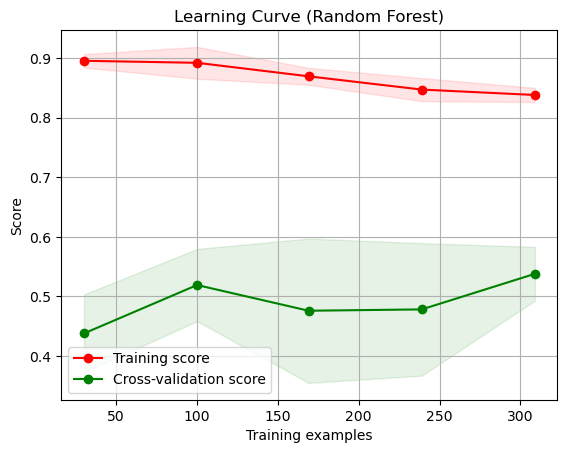

In [199]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters:
    - estimator: Your machine learning model (Random Forest in this case)
    - title: Title for the chart
    - X: Input features
    - y: Target variable
    - cv: Cross-validation strategy
    - n_jobs: Number of jobs to run in parallel
    - train_sizes: Relative or absolute numbers of training examples that will be used to generate the learning curve
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curve (Random Forest)"
cv = None
plot_learning_curve(models["RandomForest"], title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()

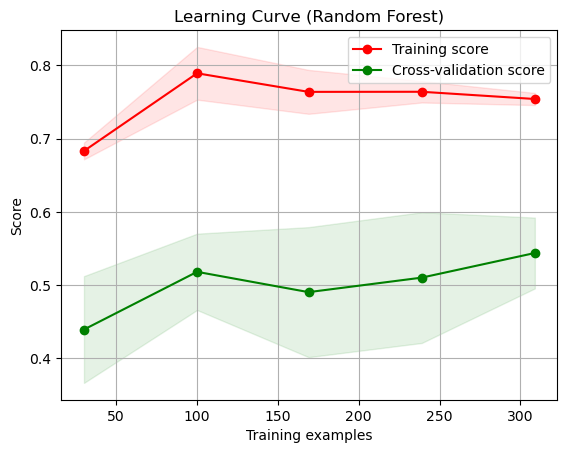

In [200]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import learning_curve

def plot_learning_curve(estimator, title, X, y, ylim=None, cv=None,
                        n_jobs=1, train_sizes=np.linspace(.1, 1.0, 5)):
    """
    Generate a simple plot of the test and training learning curve.

    Parameters:
    - estimator: Your machine learning model (Random Forest in this case)
    - title: Title for the chart
    - X: Input features
    - y: Target variable
    - cv: Cross-validation strategy
    - n_jobs: Number of jobs to run in parallel
    - train_sizes: Relative or absolute numbers of training examples that will be used to generate the learning curve
    """
    plt.figure()
    plt.title(title)
    if ylim is not None:
        plt.ylim(*ylim)
    plt.xlabel("Training examples")
    plt.ylabel("Score")
    train_sizes, train_scores, test_scores = learning_curve(
        estimator, X, y, cv=cv, n_jobs=n_jobs, train_sizes=train_sizes)
    train_scores_mean = np.mean(train_scores, axis=1)
    train_scores_std = np.std(train_scores, axis=1)
    test_scores_mean = np.mean(test_scores, axis=1)
    test_scores_std = np.std(test_scores, axis=1)
    plt.grid()

    plt.fill_between(train_sizes, train_scores_mean - train_scores_std,
                     train_scores_mean + train_scores_std, alpha=0.1,
                     color="r")
    plt.fill_between(train_sizes, test_scores_mean - test_scores_std,
                     test_scores_mean + test_scores_std, alpha=0.1, color="g")
    plt.plot(train_sizes, train_scores_mean, 'o-', color="r",
             label="Training score")
    plt.plot(train_sizes, test_scores_mean, 'o-', color="g",
             label="Cross-validation score")

    plt.legend(loc="best")
    return plt


title = "Learning Curve (Random Forest)"
cv = None
plot_learning_curve(best_model, title, X_train, y_train, cv=cv, n_jobs=-1)

plt.show()